In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
dataset = pd.read_csv('water_potability_preprocessed.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Decision Tree

In [27]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")


Decision Tree Accuracy: 0.600609756097561


# Random Forest

In [28]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.6661585365853658


# Artificial Neural Network

In [29]:
# Artificial Neural Network (MLP)
from sklearn.neural_network import MLPClassifier, MLPRegressor
ann_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=0)
# Change to a regressor for continuous target variables
ann_classifier = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=0)
ann_classifier = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='sgd', random_state=0)



In [30]:
# Artificial Neural Network (MLP Classifier)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=0)
ann_classifier.fit(X_train, y_train)
ann_y_pred = ann_classifier.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_y_pred)
print(f"\nArtificial Neural Network Accuracy: {ann_accuracy}")


Artificial Neural Network Accuracy: 0.6128048780487805


C:\Users\nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Accuracy Plot

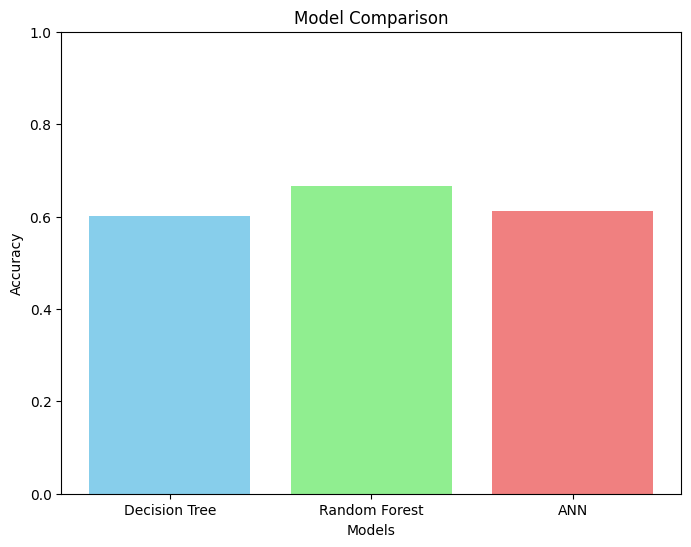

In [31]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'ANN']
accuracies = [dt_accuracy, rf_accuracy, ann_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()